# Analyse des données socio-économiques

In [76]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from gapminder import gapminder

### 1) 

Commencez par importer le module gapminder avec pip. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder.

Utilisez les méthodes head(), describe() et info() pour vous familiariser.

In [23]:
gapminder.head(13)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [9]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [10]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 2)
Utilisez la commande pandas.DataFrame.hist(gapminder) pour vous faire une idée plus précise des valeurs dans la base de données.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

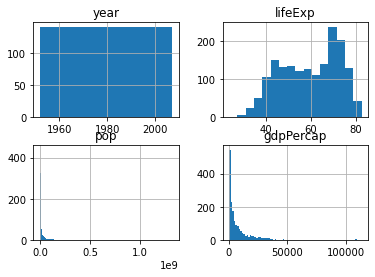

In [30]:
pd.DataFrame.hist(gapminder, bins='auto')

### Q1. Que pouvez-vous conclure à partir de ces histogrammes ?

TODO: add Lazar Text

### 3) 

Trouvez combien d’observations il y a par pays (c.a.d., combien de données par
année par pays) et vérifiez s’il y a des données manquantes.

In [58]:
observationsByCountry = len(gapminder.loc[gapminder['country'] == 'Afghanistan'])
nbCountries = gapminder['country'].nunique()
totalObservations = len(gapminder['country'])

isMissingValue = nbCountries * observationsByCountry != totalObservations

# print(nbCountries)

if isMissingValue:
    print("Il manque des données.")
else:
    print("Il ne manque aucune donnée.")


Il ne manque aucune donnée.


### 4) 
Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. p.ex. utilisez la méthode unique().

In [44]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [53]:
gapminder['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [54]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

### 5) 

Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007.

Générez un bar chart permettant la comparaison de ces moyennes.

Text(0, 0.5, 'Life Experience')

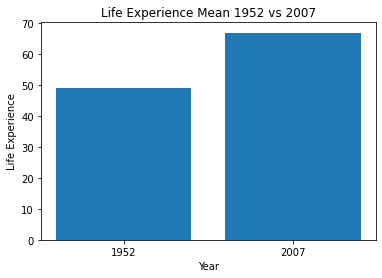

In [95]:
lifeExpMean = gapminder.groupby('year')['lifeExp'].mean()
year = np.array([1952, 2007])
lifeExp = lifeExpMean[year]

x = np.arange(len(year)) 
plt.bar(x, lifeExp) 
plt.xticks(x, year) 
plt.title('Life Experience Mean 1952 vs 2007') 
plt.xlabel('Year') 
plt.ylabel('Life Experience') 

### 6) 
Calculez la moyenne de l’espérance de vie des pays par continent en 1952 et en 2007.

Générez un bar chart permettant la comparaison de ces moyennes.

In [101]:
lifeExpMean = gapminder.groupby('continent')['lifeExp'].mean()

# TODO: make a grouped bar chart, 2 bars by continent (1952 et 2007)

print(lifeExpMean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


### Q2. Quel continent a eu la plus grande progression ?

TODO